In [1]:
from network import *
from inference import *
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [15]:
T,N = 100,50
symmetric=True

network = Network(N=N, dirichlet=0.5)

A0 = network.generate_A0(T=T, avg_degree=100, symmetric=symmetric)
if symmetric: 
    for t in range(T): 
        assert(np.all(A0[t] == A0[t].T))
    
A1 = network.apply_exposure(A0, K_exp=3)

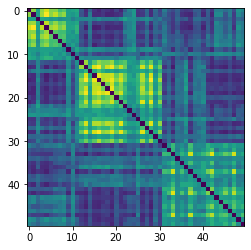

In [3]:
plt.imshow(A0.sum(axis=0))

In [4]:
mu, Z, u, w = network.get_mu(), network.get_Z(), network.get_u(), network.get_w()

In [5]:
print("average degree A0: ", A0.sum()/T/N, "average degree A1: ", A1.sum()/T/N)

average degree A0:  99.97399999999999 average degree A1:  33.578


### The probability of exposure is $\frac{1}{K_{exp}}$

## Testing Exposure Inference

In [6]:
losses_exp, theta_exp = fit(A1, 3,3, symmetric=symmetric, iter1=200)
mu_exp,Q_exp,u_exp,_,w_exp = theta_exp

running Exp inference for 3000 iterations: 



/home/jschulz/DynamicExposure/src/inference.py:49: RuntimeWarning: divide by zero encountered in true_divide
  entropy = control_well_definedness(Q*np.log(1/Q) + (1-Q)*np.log(1/(1-Q)))
/home/jschulz/DynamicExposure/src/inference.py:49: RuntimeWarning: invalid value encountered in multiply
  entropy = control_well_definedness(Q*np.log(1/Q) + (1-Q)*np.log(1/(1-Q)))
/home/jschulz/DynamicExposure/src/inference.py:49: RuntimeWarning: invalid value encountered in log
  entropy = control_well_definedness(Q*np.log(1/Q) + (1-Q)*np.log(1/(1-Q)))
/home/jschulz/DynamicExposure/src/inference.py:58: RuntimeWarning: invalid value encountered in log
  prior = control_well_definedness(np.log(mu_ij) * Q.sum(axis=0) + np.log(1-mu_ij) * (T - Q.sum(axis=0)))


Convergence Criterium satisfied
Exposure inference with T=100, N=50, K=3 and 1250 iterations took 19.80049198299821 seconds



In [7]:
print("Accuracy predicting mu: ", evaluate_memberships(mu, mu_exp, mu, mu_exp)[0])
print("Accuracy predicting u: ", evaluate_memberships(u, u_exp, mu, mu_exp)[0])
print("Accuracy predicting Z: ", calculate_AUC(Z, Q_exp))

Accuracy predicting mu:  0.7519949642592781
Accuracy predicting u:  0.9893593332018519
Accuracy predicting Z:  0.9440436188119621


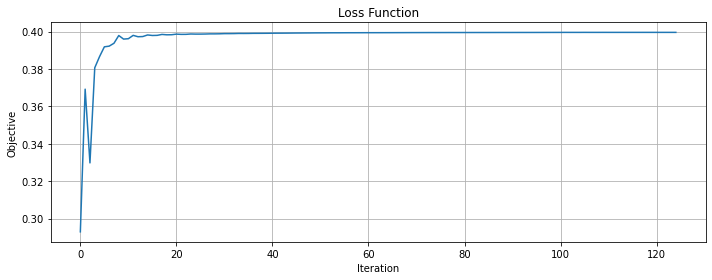

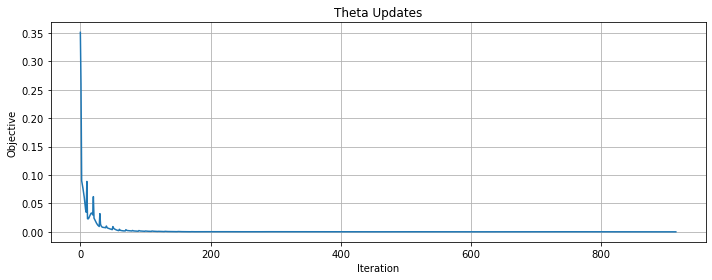

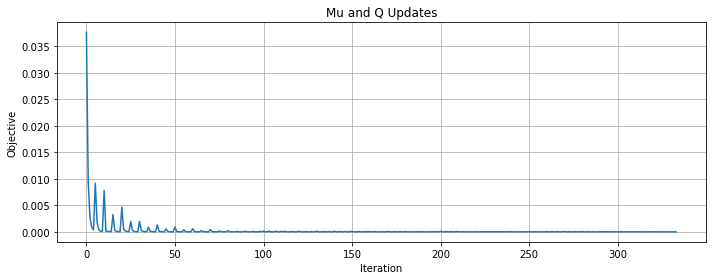

In [8]:
plot_losses(losses_exp[0], title="Loss Function")
plot_losses(losses_exp[1], title="Theta Updates")
plot_losses(losses_exp[2], title="Mu and Q Updates")

## No Exposure Inference

In [9]:
losses_noexp, theta_noexp = fit(np.expand_dims(A0.sum(axis=0), 0), 3,3, symmetric=symmetric, exp=False)
u_noexp,v_noexp,w_noexp = theta_noexp

running NoExp inference for 20000 iterations: 

No exposure inference with T=1, N=50, K=3 and 10001 iterations took 9.922130613002082 seconds



In [10]:
evaluate_memberships(u, u_noexp, u, u_noexp, verbose=True)

Acccuracy of predictions: 
	 u: 0.9943994899545949
	 v: 0.9943994899545949
Zero estimate counts: 
	 u: 0
	 v: 0





(0.9943994899545949, 0.9943994899545949, 50, 50)

# Open Questions
- why is the loss function decreasing sometimes?
    - loss function decreases when only updating mu and Q
    - potentially numerical update problems, then nothing needs to be done
    - otherwise it could be an error in the loss computation or in the updates
- how to setup experiments? 
    - difficulty can be controlled by varying $T=\{1,5,10,50,100\}$
    - influence of exposure can be controlled by varying $K_{exp}= \{3,5,7\}$ as $p_{exp}=\frac{1}{K_{exp}}$
    - $N=100$ (not too big, close to sociopatterns datasets)
    - $avg\ degree\ A^0=100$
    - $K_{aff}=3$
    - 5 random seeds for inference
    - 5 random seeds for network generation
- theory and code always for symmetric adjacency matrices?
    - I would propose so, as it makes everything easier, we can then say it can easily be generalized for not symmetric cases
    - I would fix correlation between u and v to be always 1, not use any hard membership vectors and fix the probability ratio to 0.1

# Symmetric vs Assymmetric Inference
- in the symmetric version, results are much worse than for the asymmetric inference
    - when setting w to be lower triangular they recover and become really good again

# ToDo
- theory for symmetric adjacency matrix

In [11]:
x = np.arange(1,10)

In [12]:
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
y = x.copy()

In [14]:
y

array([1, 2, 3, 4, 5, 6, 7, 8, 9])